In [1]:
import csv
import pandas as pd
import ast
import tqdm

import xgboost as xgb
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, mean_squared_error
import sklearn.preprocessing as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([])

In [3]:
i = 0
with open('result/log.csv', 'r') as file:
  csv_reader = csv.reader(file)
  for row in csv_reader:
    i += 1
    if i < 10**4 + 1:
      print(i)
    else:
      break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
loding_index = 0
loding_rows = 10**4
with open('result/log.csv', 'r') as file:
  csv_reader = csv.reader(file)
  for row in csv_reader:
      loding_index += 1
      if loding_index < loding_rows+1:
        print(((loding_index*10000)//loding_rows)/100)
        log = list(row)
        result = log[-1]
        log = log[:-1]
        for l in log:
          data = {}
          l = ast.literal_eval(l)
          now = l['now']
          kind = l['kind']
          choices = l['choices']
          choice = l['choice']
          # print(now.keys())
          card_number = now['card_number']
          my_hands = now['my_hands']
          my_played = now['my_played']
          other_played = now['other_played']
          look_hands = now['look_hands']
          looked_hands = now['looked_hands']
          pred_data = now['pred']
          reincarnation = int(now['reincarnation'])
          
          data['card_number'] = int(card_number)
          for j in range(2):
            if j < len(my_hands):
              data[f'my_hands_{j}'] = int(my_hands[j])
            else:
              data[f'my_hands_{j}'] = 0

          for j in range(15):
            if j < len(my_played):
              data[f'my_played_{j}'] = int(my_played[j])
            else:
              data[f'my_played_{j}'] = 0
          
          for j in range(len(list(other_played.keys()))):
            for k in range(15):
              if k < len(other_played[j]):
                data[f'other_played_{j}_{k}'] = int(other_played[j][k])
              else:
                data[f'other_played_{j}_{k}'] = 0
            
            for k in range(15):
              if k < len(look_hands[j]):
                data[f'look_hands_{j}_{k}'] = int(look_hands[j][k])
              else:
                data[f'look_hands_{j}_{k}'] = 0
            
            for k in range(15):
              if k < len(looked_hands[j]):
                data[f'looked_hands_{j}_{k}'] = int(looked_hands[j][k])
              else:
                data[f'looked_hands_{j}_{k}'] = 0
            
            for k in range(2):
              if k < len(pred_data[j]):
                p = pred_data[j][k]
                data[f'pred_{j}_{k}_object'] = int(p['object'])
                data[f'pred_{j}_{k}_predcard'] = int(p['pred_card'])
              else:
                data[f'pred_{j}_{k}_object'] = 0
                data[f'pred_{j}_{k}_predcard'] = 0
              
              if k < len(pred_data[-1]):
                p = pred_data[-1][k]
                data[f'pred_{-1}_{k}_object'] = int(p['object'])
                data[f'pred_{-1}_{k}_predcard'] = int(p['pred_card'])
              else:
                data[f'pred_{-1}_{k}_object'] = 0
                data[f'pred_{-1}_{k}_predcard'] = 0
          
          data['reincarnation'] = reincarnation
          data['kind'] = kind
          for i in range(10):
            if i < len(choices):
              data[f'choices_{i}'] = choices[i]
            else:
              data[f'choices_{i}'] = 0
          data['choice'] = choice
          data['result'] = result

          insert = pd.DataFrame(data,index=[0]) 
          df = pd.concat([df,insert])
      else:
        break
      


0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.38
1.39
1.4
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1.58
1.59
1.6
1.61
1.62
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.72
1.73
1.74
1.75
1.76
1.77
1.78
1.79
1.8
1.81
1.82
1.83
1.84
1.85
1.86
1.87
1.88
1.89
1.9
1.91
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2.0
2.01
2.02
2.03
2.04


In [5]:
df

,card_number,my_hands_0,my_hands_1,my_played_0,my_played_1,my_played_2,my_played_3,my_played_4,my_played_5,my_played_6,...,choices_2,choices_3,choices_4,choices_5,choices_6,choices_7,choices_8,choices_9,choice,result
0,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,lose
0,15,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,lose
0,14,3,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,lose
0,14,6,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lose
0,13,6,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,8,5,0,7,5,7,2,2,0,0,...,0,0,0,0,0,0,0,0,0,lose
0,8,5,0,7,5,7,2,2,0,0,...,3,4,5,6,7,8,9,10,3,lose
0,7,5,0,7,5,7,2,2,0,0,...,0,0,0,0,0,0,0,0,4,lose
0,6,5,4,7,5,7,2,2,0,0,...,0,0,0,0,0,0,0,0,5,lose


In [6]:
df.columns

Index(['card_number', 'my_hands_0', 'my_hands_1', 'my_played_0', 'my_played_1',
       'my_played_2', 'my_played_3', 'my_played_4', 'my_played_5',
       'my_played_6', 'my_played_7', 'my_played_8', 'my_played_9',
       'my_played_10', 'my_played_11', 'my_played_12', 'my_played_13',
       'my_played_14', 'other_played_0_0', 'other_played_0_1',
       'other_played_0_2', 'other_played_0_3', 'other_played_0_4',
       'other_played_0_5', 'other_played_0_6', 'other_played_0_7',
       'other_played_0_8', 'other_played_0_9', 'other_played_0_10',
       'other_played_0_11', 'other_played_0_12', 'other_played_0_13',
       'other_played_0_14', 'look_hands_0_0', 'look_hands_0_1',
       'look_hands_0_2', 'look_hands_0_3', 'look_hands_0_4', 'look_hands_0_5',
       'look_hands_0_6', 'look_hands_0_7', 'look_hands_0_8', 'look_hands_0_9',
       'look_hands_0_10', 'look_hands_0_11', 'look_hands_0_12',
       'look_hands_0_13', 'look_hands_0_14', 'looked_hands_0_0',
       'looked_hands_0_1', 'l

In [7]:
df = df.reset_index()

In [8]:
df.columns

Index(['index', 'card_number', 'my_hands_0', 'my_hands_1', 'my_played_0',
       'my_played_1', 'my_played_2', 'my_played_3', 'my_played_4',
       'my_played_5', 'my_played_6', 'my_played_7', 'my_played_8',
       'my_played_9', 'my_played_10', 'my_played_11', 'my_played_12',
       'my_played_13', 'my_played_14', 'other_played_0_0', 'other_played_0_1',
       'other_played_0_2', 'other_played_0_3', 'other_played_0_4',
       'other_played_0_5', 'other_played_0_6', 'other_played_0_7',
       'other_played_0_8', 'other_played_0_9', 'other_played_0_10',
       'other_played_0_11', 'other_played_0_12', 'other_played_0_13',
       'other_played_0_14', 'look_hands_0_0', 'look_hands_0_1',
       'look_hands_0_2', 'look_hands_0_3', 'look_hands_0_4', 'look_hands_0_5',
       'look_hands_0_6', 'look_hands_0_7', 'look_hands_0_8', 'look_hands_0_9',
       'look_hands_0_10', 'look_hands_0_11', 'look_hands_0_12',
       'look_hands_0_13', 'look_hands_0_14', 'looked_hands_0_0',
       'looked_hands

In [9]:
df['my_hands_0']

0        0
1        3
2        3
3        6
4        6
        ..
98428    5
98429    5
98430    5
98431    5
98432    4
Name: my_hands_0, Length: 98433, dtype: int64

In [10]:
set(df['kind'])

{'draw', 'opponentChoice', 'play_card', 'pred', 'trush'}

In [11]:
# データを全て数字化
for i in tqdm.tqdm(range(len(list(df['result'])))):
    if df.iloc[i]['result'] == 'lose':
        df.at[i,'result'] = 0
    else:
        df.at[i,'result'] = 1
    
    if df.iloc[i]['kind'] == 'draw':
        df.at[i,'kind'] = 0
    elif df.iloc[i]['kind'] == 'opponentChoice':
        df.at[i,'kind'] = 1
    elif df.iloc[i]['kind'] == 'play_card':
        df.at[i,'kind'] = 2
    elif df.iloc[i]['kind'] == 'pred':
        df.at[i,'kind'] = 3
    elif df.iloc[i]['kind'] == 'trush':
        df.at[i,'kind'] = 4
    

print(df.dtypes)

100%|██████████| 98433/98433 [00:09<00:00, 10883.26it/s]

index           int64
card_number     int64
my_hands_0      int64
my_hands_1      int64
my_played_0     int64
                ...  
choices_7       int64
choices_8       int64
choices_9       int64
choice          int64
result         object
Length: 86, dtype: object


In [12]:
df = df.fillna(0)
df = df.astype(float)
df = df.drop(columns='index')
df

/var/folders/jy/gtsybqmx72s2yd3804v9x20m0000gn/T/ipykernel_13572/4224905295.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,card_number,my_hands_0,my_hands_1,my_played_0,my_played_1,my_played_2,my_played_3,my_played_4,my_played_5,my_played_6,...,choices_2,choices_3,choices_4,choices_5,choices_6,choices_7,choices_8,choices_9,choice,result
0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2,14.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,14.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98428,8.0,5.0,0.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98429,8.0,5.0,0.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,3.0,0.0
98430,7.0,5.0,0.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
98431,6.0,5.0,4.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [13]:
print(df.dtypes)

card_number    float64
my_hands_0     float64
my_hands_1     float64
my_played_0    float64
my_played_1    float64
                ...   
choices_7      float64
choices_8      float64
choices_9      float64
choice         float64
result         float64
Length: 85, dtype: object


In [14]:
from seaborn_analyzer import regplot
from xgboost import XGBRegressor
from sklearn.model_selection import KFold



In [15]:
df_test = df

OBJECTIVE_VARIALBLE = 'result'  # 目的変数
USE_EXPLANATORY = ['card_number', 'my_hands_0', 'my_hands_1', 'my_played_0', 'my_played_1',
                    'my_played_2', 'my_played_3', 'my_played_4', 'my_played_5',
                    'my_played_6', 'my_played_7', 'my_played_8', 'my_played_9',
                    'my_played_10', 'my_played_11', 'my_played_12', 'my_played_13',
                    'my_played_14', 'other_played_0_0', 'other_played_0_1',
                    'other_played_0_2', 'other_played_0_3', 'other_played_0_4',
                    'other_played_0_5', 'other_played_0_6', 'other_played_0_7',
                    'other_played_0_8', 'other_played_0_9', 'other_played_0_10',
                    'other_played_0_11', 'other_played_0_12', 'other_played_0_13',
                    'other_played_0_14', 'look_hands_0_0', 'look_hands_0_1',
                    'look_hands_0_2', 'look_hands_0_3', 'look_hands_0_4', 'look_hands_0_5',
                    'look_hands_0_6', 'look_hands_0_7', 'look_hands_0_8', 'look_hands_0_9',
                    'look_hands_0_10', 'look_hands_0_11', 'look_hands_0_12',
                    'look_hands_0_13', 'look_hands_0_14', 'looked_hands_0_0',
                    'looked_hands_0_1', 'looked_hands_0_2', 'looked_hands_0_3',
                    'looked_hands_0_4', 'looked_hands_0_5', 'looked_hands_0_6',
                    'looked_hands_0_7', 'looked_hands_0_8', 'looked_hands_0_9',
                    'looked_hands_0_10', 'looked_hands_0_11', 'looked_hands_0_12',
                    'looked_hands_0_13', 'looked_hands_0_14', 'pred_0_0_object',
                    'pred_0_0_predcard', 'pred_-1_0_object', 'pred_-1_0_predcard',
                    'pred_0_1_object', 'pred_0_1_predcard', 'pred_-1_1_object',
                    'pred_-1_1_predcard', 'reincarnation', 'kind', 'choices_0', 'choices_1',
                    'choices_2', 'choices_3', 'choices_4', 'choices_5', 'choices_6',
                    'choices_7', 'choices_8', 'choices_9', 'choice']

df_test

,card_number,my_hands_0,my_hands_1,my_played_0,my_played_1,my_played_2,my_played_3,my_played_4,my_played_5,my_played_6,...,choices_2,choices_3,choices_4,choices_5,choices_6,choices_7,choices_8,choices_9,choice,result
0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2,14.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,14.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98428,8.0,5.0,0.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98429,8.0,5.0,0.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,3.0,0.0
98430,7.0,5.0,0.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
98431,6.0,5.0,4.0,7.0,5.0,7.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score

# 乱数シード
seed = 42

X = df_test[USE_EXPLANATORY].values
y = df_test[OBJECTIVE_VARIALBLE].values

fit_params = {'verbose': 0,  # 学習中のコマンドライン出力
            #   'early_stopping_rounds': 10,  # 学習時、評価指標がこの回数連続で改善しなくなった時点でストップ
            #   'eval_metric': 'rmse',  # early_stopping_roundsの評価指標
              'eval_set': [(X, y)]  # early_stopping_roundsの評価指標算出用データ
              }

cv = KFold(n_splits=5, shuffle=True, random_state=seed)  # KFoldでクロスバリデーション分割指定

model = XGBRegressor()

scoring = 'neg_mean_squared_error'  # 評価指標をRMSEに指定
# クロスバリデーションで評価指標算出
scores = cross_val_score(model, X, y, cv=cv,
                         scoring=scoring, n_jobs=-1, fit_params=fit_params)
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

/Users/huchi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


scores=[-0.20078222 -0.20149838 -0.20296219 -0.20264045 -0.19966449]
average_score=-0.20150954580477168


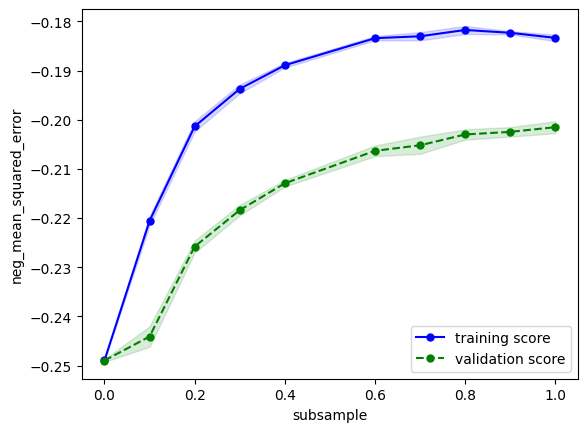

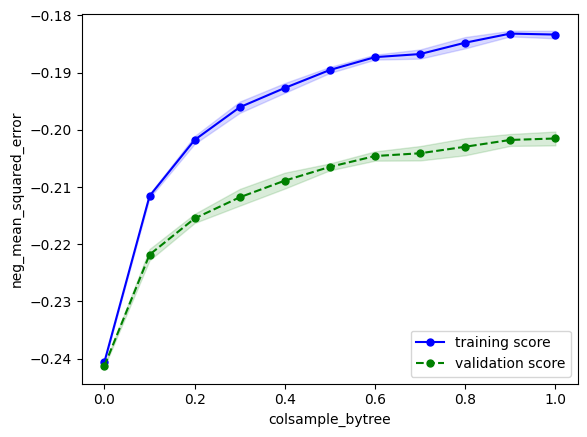

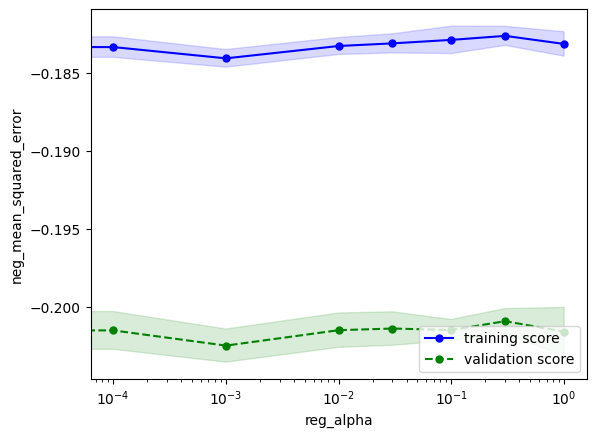

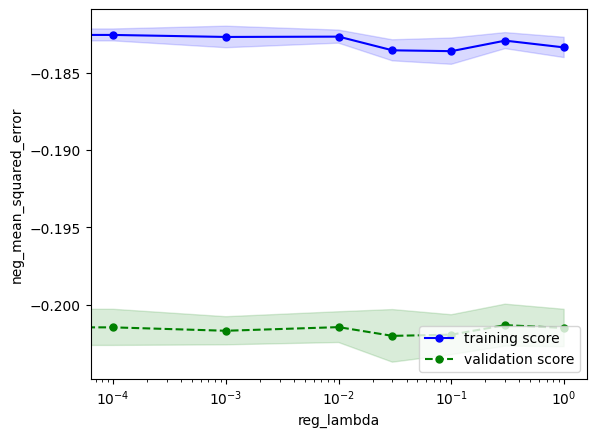

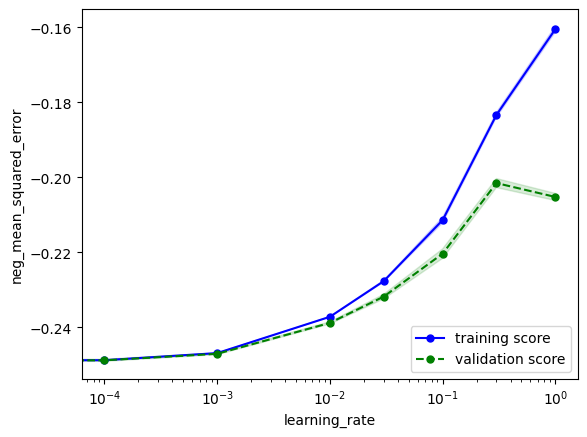

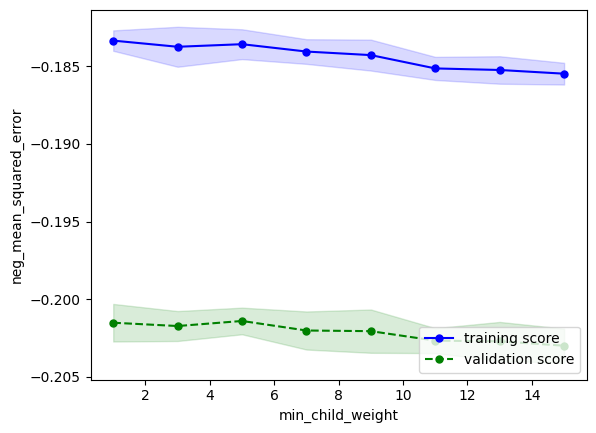

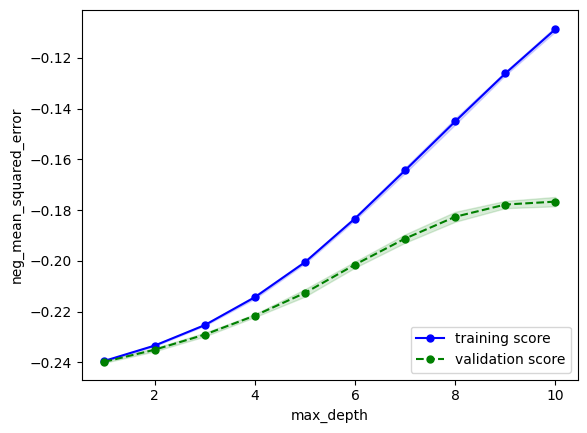

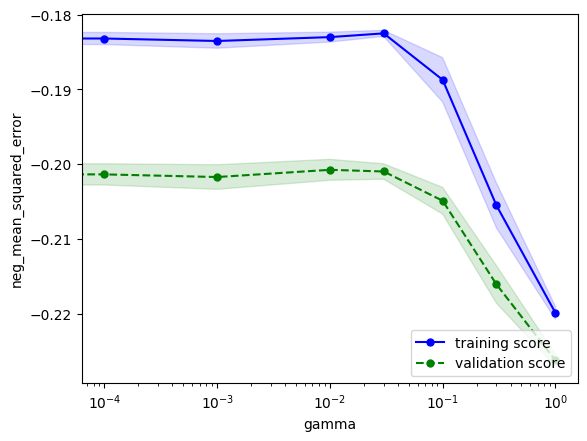

In [17]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
cv_params = {'subsample': [0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0],
             'colsample_bytree': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'reg_alpha': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'reg_lambda': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'learning_rate': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'min_child_weight': [1, 3, 5, 7, 9, 11, 13, 15],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'gamma': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0]
             }
param_scales = {'subsample': 'linear',
                'colsample_bytree': 'linear',
                'reg_alpha': 'log',
                'reg_lambda': 'log',
                'learning_rate': 'log',
                'min_child_weight': 'linear',
                'max_depth': 'linear',
                'gamma': 'log'
                }
# 検証曲線のプロット（パラメータ毎にプロット）
for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールをparam_scalesに合わせて変更
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()


In [18]:
import optuna
import time
start = time.time()
# ベイズ最適化時の評価指標算出メソッド
def bayes_objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 8),
        'max_depth': trial.suggest_int('max_depth', 1, 4),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 0.1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 0.1, log=True),
        'gamma': trial.suggest_float('gamma', 0.0001, 0.1, log=True),
    }
    # モデルにパラメータ適用
    model.set_params(**params)
    # cross_val_scoreでクロスバリデーション
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, fit_params=fit_params, n_jobs=-1)
    val = scores.mean()
    return val

# ベイズ最適化を実行
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(bayes_objective, n_trials=600)

# 最適パラメータの表示と保持
best_params = study.best_trial.params
best_score = study.best_trial.value
print(f'最適パラメータ {best_params}\nスコア {best_score}')
print(f'所要時間{time.time() - start}秒')


[I 2025-04-22 02:56:58,178] A new study created in memory with name: no-name-ee5fb6b2-7125-4304-9a4c-bdde81a24f58
/Users/huchi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[I 2025-04-22 02:57:11,551] Trial 0 finished with value: -0.23782404054564102 and parameters: {'learning_rate': 0.03574712922600244, 'min_child_weight': 8, 'max_depth': 3, 'colsample_bytree': 0.6789267873576292, 'subsample': 0.3248149123539492, 'reg_alpha': 0.002051110418843397, 'reg_lambda': 0.0013066739238053278, 'gamma': 0.0396760507705299}. Best is trial 0 with value: -0.23782404054564102.
[I 2025-04-22 02:57:24,595] Trial 1 finished with value: -0.24156311986258308 and parameters: {'learning_rate': 0.07725378389307355, 'min_child_weight': 6, 'max_depth': 1, 'colsample_bytree': 0.9759278817295955, 'subsample': 0.8659541126403374, 'reg_alpha': 0.

最適パラメータ {'learning_rate': 0.29940662796766704, 'min_child_weight': 3, 'max_depth': 4, 'colsample_bytree': 0.9843991505832022, 'subsample': 0.9784928713985326, 'reg_alpha': 0.0125560928908058, 'reg_lambda': 0.059573264288480164, 'gamma': 0.026573682456154445}
スコア -0.22105448287141177
所要時間7346.511674880981秒


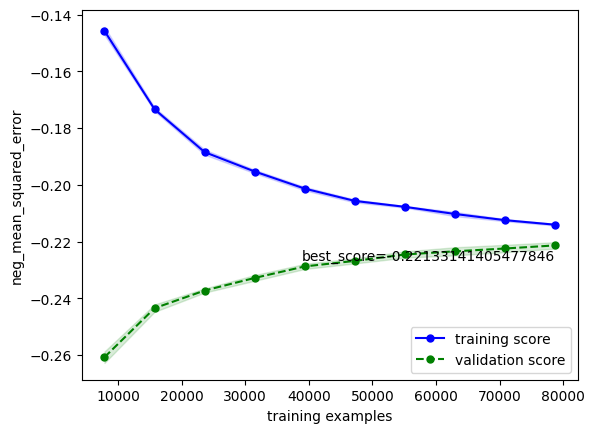

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# 最適パラメータを学習器にセット
model.set_params(**best_params)

# 学習曲線の取得
train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                         X=X, y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         fit_params=fit_params,
                                                         cv=cv, scoring=scoring, n_jobs=-1)
# 学習データ指標の平均±標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std
# 検証データ指標の平均±標準偏差を計算
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std
# training_scoresをプロット
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scoresをプロット
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')
# 最高スコアの表示
best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
# 軸ラベルおよび凡例の指定
plt.xlabel('training examples')  # 学習サンプル数を横軸ラベルに
plt.ylabel(scoring)  # スコア名を縦軸ラベルに
plt.legend(loc='lower right')  # 凡例

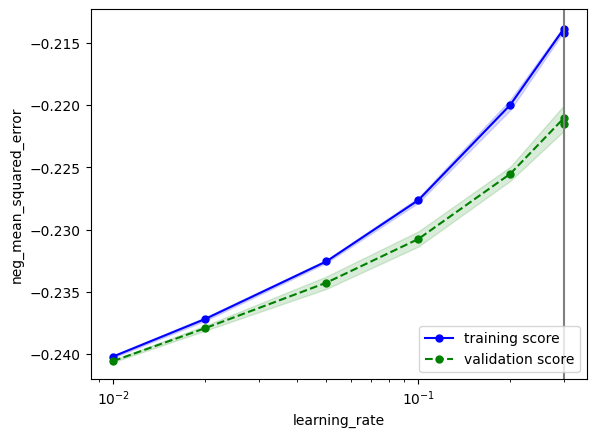

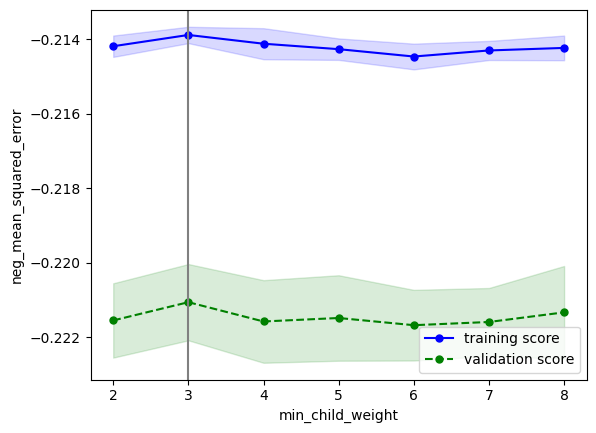

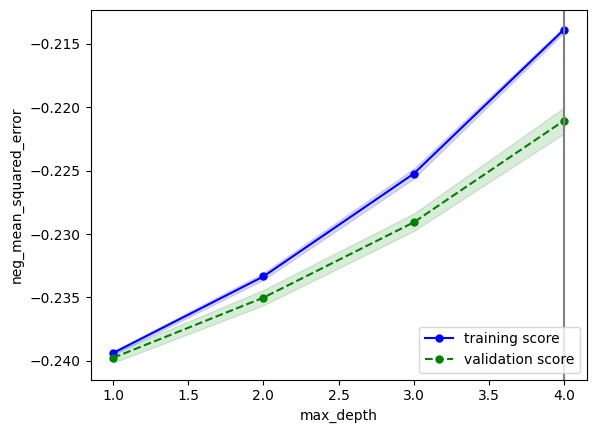

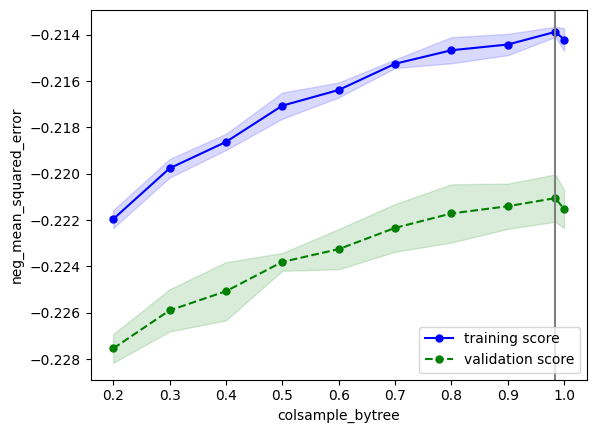

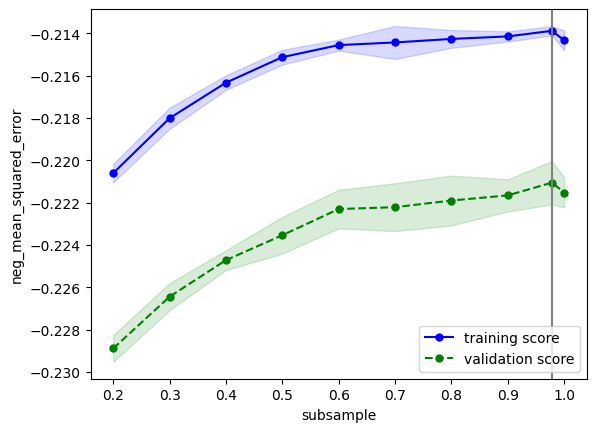

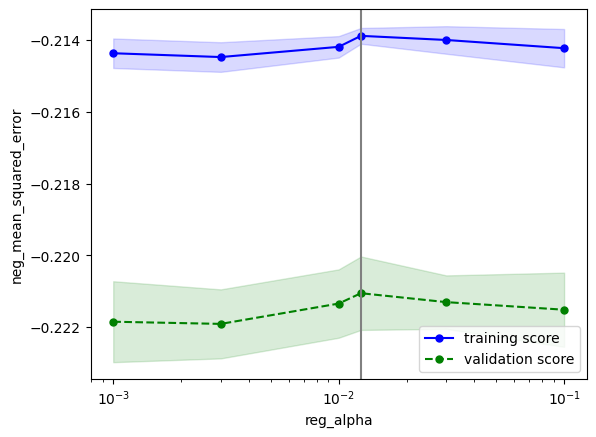

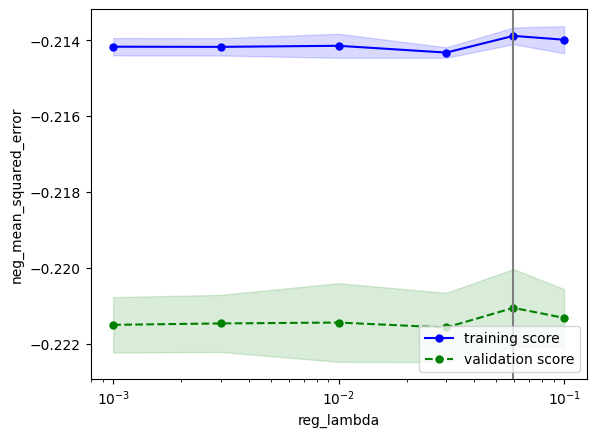

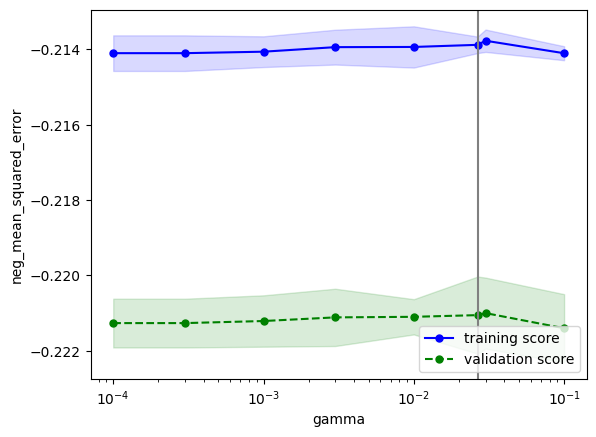

In [20]:
from sklearn.model_selection import validation_curve
# 検証曲線描画対象パラメータ
valid_curve_params = {'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
                      'min_child_weight': [2, 3, 4, 5, 6, 7, 8],
                      'max_depth': [1, 2, 3, 4],
                      'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      'reg_alpha': [0.001, 0.003, 0.01, 0.03, 0.1],
                      'reg_lambda': [0.001, 0.003, 0.01, 0.03, 0.1],
                      'gamma': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
                      }
param_scales = {'learning_rate': 'log',
                'min_child_weight': 'linear',
                'max_depth': 'linear',
                'colsample_bytree': 'linear',
                'subsample': 'linear',                
                'reg_alpha': 'log',
                'reg_lambda': 'log',                
                'gamma': 'log'
                }
# 最適パラメータを上記描画対象に追加
for k, v in valid_curve_params.items():
    if best_params[k] not in v:
        v.append(best_params[k])
        v.sort()
for i, (k, v) in enumerate(valid_curve_params.items()):
    # モデルに最適パラメータを適用
    model.set_params(**best_params)
    # 検証曲線を描画
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # 最適パラメータを縦線表示
    plt.axvline(x=best_params[k], color='gray')
    # スケールをparam_scalesに合わせて変更
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

In [ ]:
import joblib

In [35]:
best_trial = study.best_trial
best_params = best_trial.params

best_model = XGBRegressor(**best_params)
best_model.fit(X, y)
joblib.dump(best_model, "xeno_xgbregressor.pkl")

['xeno_xgbregressor.pkl']